In [4]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score


In [5]:
# Loading data
data = pd.read_csv("trades_clustered_ML_Ver03.csv",delimiter=";")
# trade list
trades = data.loc[data['profit'] != 0]
trades.columns

Index(['Open', 'High', 'Low', 'Close', 'EMA_value_6', 'CCI_3', 'CCI_12',
       'CCI_18', 'CCI_24', 'CCI_30', 'ADX', 'RSI_12', 'RSI_14', 'RSI_18',
       'RSI_24', 'RSI_30', 'macd', 'macdsignal', 'macdhist', 'Bolinger_upper',
       'Bolinger_middle', 'Bolinger_lower', 'ATR', 'threeinrow_type',
       'move_strength', 'move_length', 'movemen_range', 'result', 'Entry_bar',
       'Entry_price', 'exit_bar', 'close_rice', 'profit', 'exit_price_2',
       'CCI_X', 'cci_spead', 'cci_acce', 'cci_acce_avg', 'cci_acce_tag_by_row',
       'cci_acce_prob_by_row', 'cum_pnl', 'EMA6', 'distance_tf1',
       'distance_tf2', 'rational_strength', 'entry_candle',
       'distance_bollinger', 'distance_ratio', 'EMA_distance1_tag',
       'EMA_distance1_prob', 'EMA_distance_ratio_tag',
       'EMA_distance_ratio_prob', 'rational_strength_tag',
       'rational_stregth_prob', 'entry_candle_tag', 'entry_candle_prob',
       'distace_bollinger_tag', 'distace_bollinger_prob',
       'rational_strength_prob',

In [6]:
# create trade dataframe
trades = trades[['CCI_3','ADX','move_strength','cci_acce_avg','distance_tf1','bollinger_I','macd','threeinrow_type','result',\
                 'distance_tf2','rational_strength','entry_candle','distance_ratio','degree']]
#drop null values
trades = trades.dropna()


In [7]:
#label encoding
type_encoder = preprocessing.LabelEncoder()
trades['threeinrow_type'] = type_encoder.fit_transform(trades['threeinrow_type'])
types =list(type_encoder.classes_)
coded_types = type_encoder.transform(types)
print(f'types are {types} which is encoded as {coded_types}')


type_encoder = preprocessing.LabelEncoder()
trades['result'] = type_encoder.fit_transform(trades['result'])
result =list(type_encoder.classes_)
coded_result = type_encoder.transform(result)
print(f'results are {result} which is encoded as {coded_result}')

types are ['bearish_3inrow', 'bullish_3inrow'] which is encoded as [0 1]
results are ['sl_hit', 'tp_hit'] which is encoded as [0 1]


In [8]:
# correct data types
trades['result'] = trades['result'].astype(np.int64)
trades['threeinrow_type'] = trades['threeinrow_type'].astype(np.int64)

#Data grouping
trades_bearish = trades[trades['threeinrow_type'] == 0].drop('threeinrow_type',axis=1)
trades_bullish = trades[trades['threeinrow_type'] == 1].drop('threeinrow_type',axis=1)


In [9]:
X_train_bearish, X_test_bearish, Y_train_bearish, Y_test_bearish = train_test_split(trades_bearish.drop(columns=["result"]) ,trades_bearish.result
                                                    ,stratify=None,test_size=0.2, shuffle=False)
print(f'FOR BEARISH: x_train shape is {X_train_bearish.shape} y_train shape is {Y_train_bearish.shape } x_test shape is {X_test_bearish.shape} y_test shape is {Y_test_bearish.shape}')

X_train_bullish, X_test_bullish, Y_train_bullish, Y_test_bullish = train_test_split(trades_bullish.drop(columns=["result"]) ,trades_bullish.result
                                                    ,stratify=None,test_size=0.2, shuffle=False)
print(f'FOR BULLISH: x_train shape is {X_train_bullish.shape} y_train shape is {Y_train_bullish.shape } x_test shape is {X_test_bullish.shape} y_test shape is {Y_test_bullish.shape}')

FOR BEARISH: x_train shape is (1000, 12) y_train shape is (1000,) x_test shape is (250, 12) y_test shape is (250,)
FOR BULLISH: x_train shape is (1094, 12) y_train shape is (1094,) x_test shape is (274, 12) y_test shape is (274,)


In [10]:
# Data Normalization
scaler = StandardScaler()
X_train_bearish = pd.DataFrame(scaler.fit_transform(X_train_bearish))
X_test_bearish = pd.DataFrame(scaler.fit_transform(X_test_bearish))

X_train_bullish = pd.DataFrame(scaler.fit_transform(X_train_bullish))
X_test_bullish = pd.DataFrame(scaler.fit_transform(X_test_bullish))



In [11]:
# features correlation analysis
# corr = trades.drop(columns=["result"]).corr()
# corr
# fig = plt.figure(figsize=(15, 25))
# ax = fig.add_subplot(111)
# mask=np.zeros_like(corr)
# mask[np.triu_indices_from(mask)] = True
# sns.heatmap(corr,
#             xticklabels=corr.columns,
#             yticklabels=corr.columns,
#            ax=ax, mask=mask, square=True,
#             cbar_kws={"shrink": 0.3},
#            cmap="binary")
# plt.show()

model is fitted and predicted for bearish dataset
              precision    recall  f1-score   support

           0       0.40      0.02      0.05        82
           1       0.67      0.98      0.80       168

    accuracy                           0.67       250
   macro avg       0.54      0.50      0.42       250
weighted avg       0.58      0.67      0.55       250

The Accuracy for Bearsh Test Set is 66.8


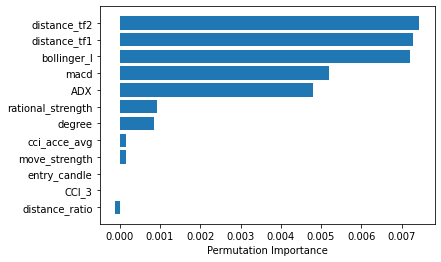

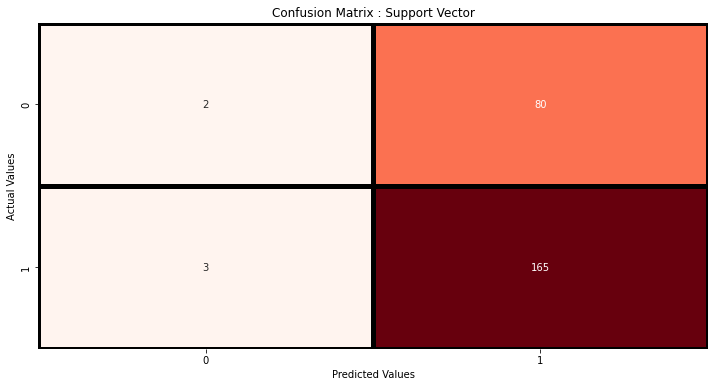

In [12]:
# Grid Search for SVM bearish
from sklearn.inspection import permutation_importance

BearishSVM =  svm.SVC(C=0.1,gamma='auto',kernel='sigmoid')

   
# fitting the model for grid search Bearish
BearishSVM.fit(X_train_bearish,Y_train_bearish)
predictions_bearish =BearishSVM.predict(X_test_bearish)


perm_importance = permutation_importance(BearishSVM, X_test_bearish, Y_test_bearish,n_repeats=100,random_state=0)
feature_names =  trades_bearish.drop('result',axis=1).columns
features = np.array(feature_names)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

print('model is fitted and predicted for bearish dataset')

#Confusion matrix for BEARISH
cm=confusion_matrix(Y_test_bearish,predictions_bearish)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix : Support Vector")
sns.heatmap(cm, annot=True,fmt='d', cmap='Reds',linewidths=5,linecolor='black',cbar=False)
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

print(classification_report(Y_test_bearish, predictions_bearish)) 
test_acc_bearish = accuracy_score(Y_test_bearish, predictions_bearish)
print("The Accuracy for Bearsh Test Set is {}".format(test_acc_bearish*100))

model is fitted and predicted for bullish dataset
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.64      1.00      0.78       174

    accuracy                           0.64       274
   macro avg       0.32      0.50      0.39       274
weighted avg       0.40      0.64      0.49       274

The Accuracy for Bullish Test Set is 63.503649635036496


C:\Program Files\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


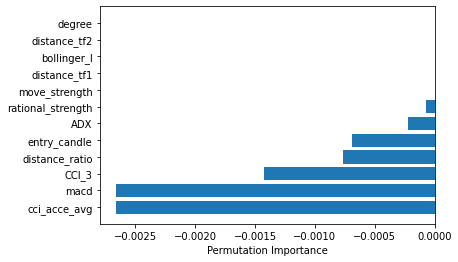

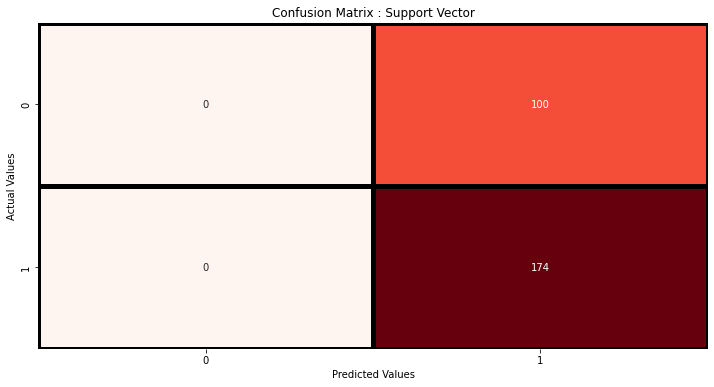

In [14]:
# Grid Search for SVM bullish

BullishSVM =  svm.SVC(C=0.05,gamma='scale',kernel='sigmoid')
   
# fitting the model for grid search Bullish
BullishSVM.fit(X_train_bullish,Y_train_bullish)
predictions_bullish = BullishSVM.predict(X_test_bullish)

perm_importance = permutation_importance(BullishSVM, X_test_bullish, Y_test_bullish,n_repeats=100,random_state=0)
feature_names = trades_bullish.drop('result',axis=1).columns
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

print('model is fitted and predicted for bullish dataset')

#Confusion matrix for BULLISH
cm=confusion_matrix(Y_test_bullish,predictions_bullish)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix : Support Vector")
sns.heatmap(cm, annot=True,fmt='d', cmap='Reds',linewidths=5,linecolor='black',cbar=False)
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

print(classification_report(Y_test_bullish, predictions_bullish)) 
test_acc_bullish = accuracy_score(Y_test_bullish, predictions_bullish)
print("The Accuracy for Bullish Test Set is {}".format(test_acc_bullish *100))

In [26]:
# fitting amd prdiction with prob

BearishSVM_prob =  svm.SVC(C=0.1,gamma='auto',kernel='sigmoid',probability=True)
BearishSVM_prob.fit(X_train_bearish,Y_train_bearish)

predictions_proba_bearish =BearishSVM_prob.predict_proba(X_test_bearish)
print(predictions_proba_bearish)
print(np.sum(predictions_proba_bearish>0.65))

[[0.39817259 0.60182741]
 [0.38838915 0.61161085]
 [0.40523293 0.59476707]
 [0.40334074 0.59665926]
 [0.40877148 0.59122852]
 [0.38416443 0.61583557]
 [0.39795709 0.60204291]
 [0.38933699 0.61066301]
 [0.38144849 0.61855151]
 [0.38682486 0.61317514]
 [0.40907783 0.59092217]
 [0.39099824 0.60900176]
 [0.38153847 0.61846153]
 [0.40407511 0.59592489]
 [0.41132723 0.58867277]
 [0.40670416 0.59329584]
 [0.40764467 0.59235533]
 [0.40702437 0.59297563]
 [0.38479266 0.61520734]
 [0.40353737 0.59646263]
 [0.38034506 0.61965494]
 [0.40044839 0.59955161]
 [0.39115419 0.60884581]
 [0.36636065 0.63363935]
 [0.37917058 0.62082942]
 [0.41313415 0.58686585]
 [0.52339345 0.47660655]
 [0.39950803 0.60049197]
 [0.3975376  0.6024624 ]
 [0.57306837 0.42693163]
 [0.55592977 0.44407023]
 [0.40146175 0.59853825]
 [0.36641749 0.63358251]
 [0.40038953 0.59961047]
 [0.40226947 0.59773053]
 [0.39765021 0.60234979]
 [0.37503903 0.62496097]
 [0.40307966 0.59692034]
 [0.40694093 0.59305907]
 [0.3743229  0.6256771 ]


2
